In [8]:
import pandas as pd
df_original=pd.read_csv("./data/data.csv")
print(df_original.head())

  Country Maker/Brand       Type Segment    2014    2015    2016    2017  \
0   Japan      Toyota  Mini Cars       A   23148   18812   21208   22158   
1   Japan      Toyota       Cars       A       0       0       0       0   
2   Japan      Toyota       Cars       A       0       0       0       0   
3   Japan      Toyota       Cars       A    2342     801     143       0   
4   Japan      Toyota       Cars       B  286270  265426  197156  146129   

     2018    2019   2020   2021   2022   2023 Region    Total  
0   25184   24076  17892  17653  15116  10354   Asia   195601  
1       0       0      0    520   1106    425   Asia     2051  
2       0     679   1670   1415   2020   1451   Asia     7235  
3       0       0      0      0      0      0   Asia     3286  
4  137626  110647  71465  77266  68951  78927   Asia  1439863  


In [21]:
df_original["Region"].unique()

array(['Asia', 'Western Europe', 'Middle East/Africa',
       'Central/Eastern Europe', 'America'], dtype=object)

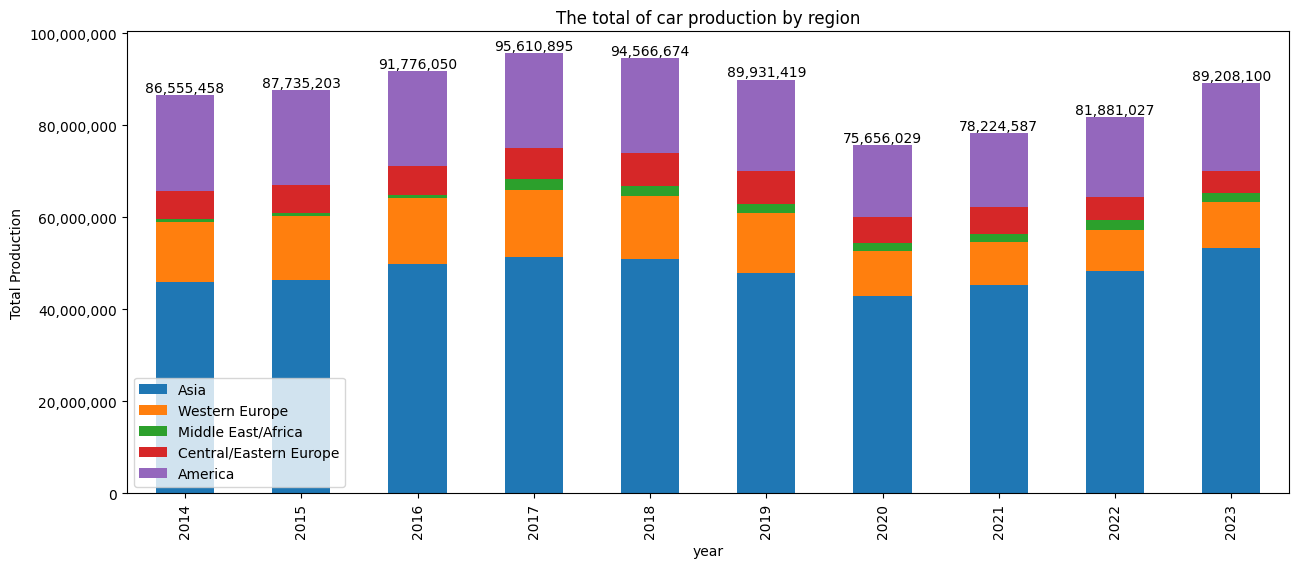

In [129]:
import matplotlib.pyplot as plt
import os
years = [i for i in range(2014,2024)]

# Create an empty dictionary to store the results
transformed_data = {
    "year": years,
}
regions = df_original["Region"].unique()

 
# Step 2: Iterate over each year and sum data by region
for region in regions:
    transformed_data[str(region)]=[]
    for year in years:
        sum_by_year = df_original[ (df_original["Region"] == region)][str(year)].sum()
        transformed_data[str(region)].append(sum_by_year)

# transformed_data
df_transformed = pd.DataFrame(transformed_data)
ax = df_transformed.plot.bar(x='year', stacked=True, title='The total of car production by region',figsize=(15, 6))
plt.ylabel("Total Production")
for container in ax.containers[4:5]:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge') 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    
my_path = os.path.abspath(__file__) # Figures out the absolute path for you in case your working directory moves around.
my_file = 'figure1_car_production_by_region.png'
ax.savefig(os.path.join(my_path, my_file))        


<Axes: title={'center': 'The number of Students'}, xlabel='year'>

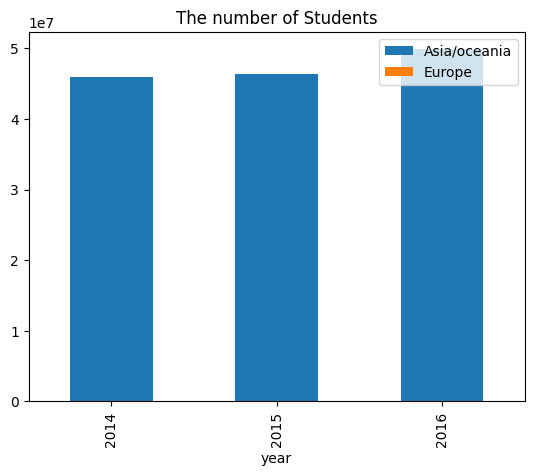

In [16]:
import pandas as pd
# Create DataFrame based on the data from the image
data = {
    "year": ["2014", "2015", "2016"],
    "Asia": [135, 242, 211],
    "Europe": [198, 124, 125]
}
df = pd.DataFrame(data)
# import ace_tools as tools; tools.display_dataframe_to_user(name="School and Gender Data", dataframe=df)
df_transformed.plot.bar(x='year', stacked=True, title='The number of Students')